In [5]:
!pip install pybamm
!pip install matplotlib


[notice] A new release of pip available: 22.3 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.0/8.0 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 188.2/188.2 kB 3.8 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 6.1 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
     ---------------------------------------- 2.6/2.6 MB 6.0 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)



[notice] A new release of pip available: 22.3 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pybamm

# Get a list of all models available in PyBaMM
models = [
    pybamm.lithium_ion.SPM(),
    pybamm.lithium_ion.SPMe(),
    pybamm.lithium_ion.DFN(),
    pybamm.lead_acid.LOQS(),
    pybamm.lead_acid.Full(),
    pybamm.equivalent_circuit.Thevenin()
]


# Search for "charge" in the available keys
for model in models:
    model_name = model.name
    print(f"Model: {model_name}")
    model_keys = model.variables.keys()
    charge_keys = [key for key in model_keys if 'temperature' in key.lower()]
    if charge_keys:
        print(f"Charge-related keys: {charge_keys}")
    else:
        print("No charge-related keys found.")
    print()


Model: Single Particle Model
Charge-related keys: ['Ambient temperature [K]', 'Volume-averaged ambient temperature [K]', 'Cell temperature [K]', 'Negative current collector temperature [K]', 'Positive current collector temperature [K]', 'X-averaged cell temperature [K]', 'Volume-averaged cell temperature [K]', 'Negative electrode temperature [K]', 'X-averaged negative electrode temperature [K]', 'Separator temperature [K]', 'X-averaged separator temperature [K]', 'Positive electrode temperature [K]', 'X-averaged positive electrode temperature [K]', 'Ambient temperature [C]', 'Volume-averaged ambient temperature [C]', 'Cell temperature [C]', 'Negative current collector temperature [C]', 'Positive current collector temperature [C]', 'X-averaged cell temperature [C]', 'Volume-averaged cell temperature [C]', 'Negative electrode temperature [C]', 'X-averaged negative electrode temperature [C]', 'Separator temperature [C]', 'X-averaged separator temperature [C]', 'Positive electrode temperat

In [2]:
parameter_values = pybamm.ParameterValues("Chen2020")
print(parameter_values)

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x00000137198A0E00>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x00000137198A1800>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 29866.0,
 'Initi

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.00531,
 'Cell thermal expansion coefficient [m.K-1]': 1.1e-06,
 'Cell volume [m3]': 2.42e-05,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x00000137198A0E00>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x00000137198A1800>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 29866.0,
 'Initi

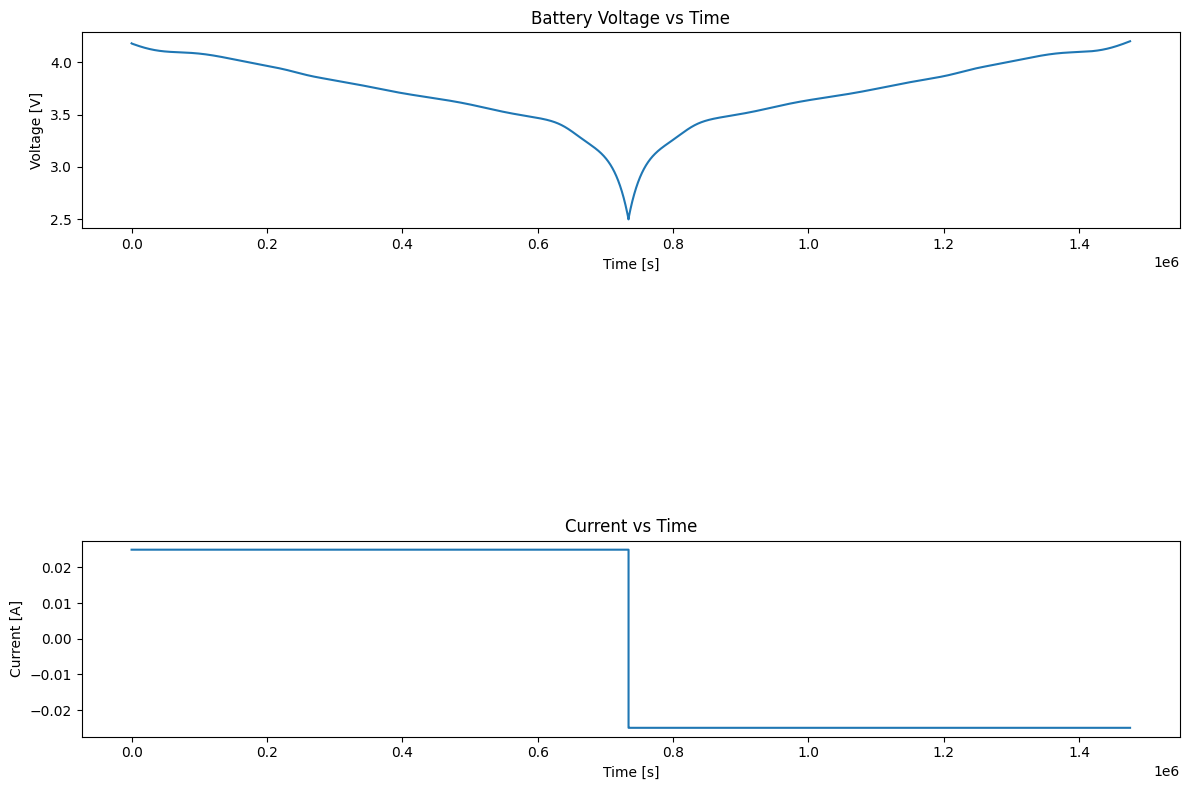

In [3]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

# Load the default model
model = pybamm.lithium_ion.DFN()
# Create a single cell parameter set
parameter_values = pybamm.ParameterValues("Chen2020")
print(parameter_values)

capacity= 0.05
max_current = 0.5 * capacity

# Define the experiment: discharge at 0.5 C-rate
experiment = pybamm.Experiment(
    [
    f"Discharge at {max_current} A until 2.5 V",
    f"Charge at {max_current} A until 4.2 V",
    ]
)

# Create and solve the simulation
simulation = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
solution = simulation.solve()

# Plot the results for a single cell
t = solution["Time [s]"].entries
voltage = solution["Terminal voltage [V]"].entries
# soc = solution["State of Charge"].entries
current = solution["Current [A]"].entries

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, voltage)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("Battery Voltage vs Time")

# plt.subplot(3, 1, 2)
# plt.plot(t, soc)
# plt.xlabel("Time [s]")
# plt.ylabel("State of Charge")
# plt.title("SoC vs Time")

plt.subplot(3, 1, 3)
plt.plot(t, current)
plt.xlabel("Time [s]")
plt.ylabel("Current [A]")
plt.title("Current vs Time")

plt.tight_layout()
plt.show()


In [84]:
import pybamm
import os

# Path to the data folder (current working directory)
path = os.path.join(os.getcwd(), "data")

# Process the data files in the data folder
ocv_data = pybamm.parameters.process_1D_data("ecm_example_ocv.csv", path=path)
r0_data = pybamm.parameters.process_3D_data_csv("ecm_example_r0.csv", path=path)
r1_data = pybamm.parameters.process_3D_data_csv("ecm_example_r1.csv", path=path)
c1_data = pybamm.parameters.process_3D_data_csv("ecm_example_c1.csv", path=path)
dUdT_data = pybamm.parameters.process_2D_data_csv("ecm_example_dudt.csv", path=path)

# Define the functions to return interpolants
def ocv(sto):
    name, (x, y) = ocv_data
    return pybamm.Interpolant(x, y, sto, name)

def r0(T_cell, current, soc):
    name, (x, y) = r0_data
    return pybamm.Interpolant(x, y, [T_cell, current, soc], name)

def r1(T_cell, current, soc):
    name, (x, y) = r1_data
    return pybamm.Interpolant(x, y, [T_cell, current, soc], name)

def c1(T_cell, current, soc):
    name, (x, y) = c1_data
    return pybamm.Interpolant(x, y, [T_cell, current, soc], name)

def dUdT(ocv, T_cell):
    name, (x, y) = dUdT_data
    return pybamm.Interpolant(x, y, [ocv, T_cell], name)

def get_parameter_values():
    """
    Example parameter set for an equivalent circuit model with a
    resistor in series with a single RC element.

    This parameter set is for demonstration purposes only and
    does not reflect the properties of any particular cell.
    Example functional dependencies have been added for each of
    the parameters to demonstrate the functionality of
    3D look-up tables models. Where parameters have been taken
    from the literature, we do not disclose the source
    in order to avoid confusion that these values represent
    any particular cell.

    The parameter values have been generated in the following
    manner:

        1. Capacity assumed to be 100Ah
        2. 100A DCIR at T25 S50 assumed to be 1mOhm
        3. DCIR assumed to have the following dependencies:
            - quadratic in SoC (increasing to 1.2mOhm
              at 0% and 100% SoC)
            - Arrhenius in temperature (with Ea=20000)
            - linear with the magnitude of the current (with
                slope 0.01 mohms per 100 amps)
        4. R0 taken to be 40% of the DCIR
        5. R1 taken to be 60% of the DCIR
        6. C1 is derived from the C1 = tau / R1 where tau=30s
        7. OCV is taken from an undisclosed literature source.
        8. dUdT is taken from an undisclosed literature source.
    """

    # N.B. actual cell capacity and nominal cell capacity
    # can be different hence the two parameters
    cell_capacity = 100

    values = {
        "Initial SoC": 0,
        "Initial temperature [K]": 25 + 273.15,
        "Cell capacity [A.h]": cell_capacity,
        "Nominal cell capacity [A.h]": cell_capacity,
        "Ambient temperature [K]": 25 + 273.15,
        "Current function [A]": 100,
        "Upper voltage cut-off [V]": 4.2,
        "Lower voltage cut-off [V]": 3.2,
        "Cell thermal mass [J/K]": 1000,
        "Cell-jig heat transfer coefficient [W/K]": 10,
        "Jig thermal mass [J/K]": 500,
        "Jig-air heat transfer coefficient [W/K]": 10,
        "Open-circuit voltage [V]": ocv,
        "R0 [Ohm]": r0,
        "Element-1 initial overpotential [V]": 0,
        "R1 [Ohm]": r1,
        "C1 [F]": c1,
        "Entropic change [V/K]": dUdT,
        "RCR lookup limit [A]": 340,
    }

    return values


In [2]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

# Load the Thevenin equivalent circuit model
model = pybamm.lithium_ion.SPM(),
parameter_values = pybamm.ParameterValues("Chen2020")
# parameter_values.update(get_parameter_values(), check_already_exists=False)

C_rate=0.5

capacity = parameter_values["Nominal cell capacity [A.h]"]
print(capacity)
# Define the experiment: discharge at 0.5 C-rate until a cutoff voltage
max_current=capacity*C_rate

experiment = pybamm.Experiment(
    [
        f"Charge at {max_current} A for 119.9 minutes",
        "Rest for 15 minutes",
        f"Discharge at {max_current} A for 119.5 minutes",
        "Rest for 15 minutes",
    ],
)


# min_soc = parameter_values["Minimum state of charge"]
# max_soc = parameter_values["Maximum state of charge"]
# print(f"Minimum state of charge: {min_soc}")
# print(f"Maximum state of charge: {max_soc}")


# Create and solve the simulation
try:
    simulation = pybamm.Simulation(model, experiment=experiment)
    solution = simulation.solve()
except pybamm.SolverError as e:
    print(f"SolverError: {e}")
    print("Simulation failed. Please check the parameter values and experiment settings.")
else:
    # Extract the necessary variables for plotting
    time = solution["Time [s]"].entries
    voltage = solution["Battery voltage [V]"].entries
    # soc = solution["SoC"].entries*100
    cell_temp = solution["Cell temperature [K]"].entries - 273.15  # Convert from K to °C
    current = solution["Current [A]"].entries
    discharge_capacity = solution["Discharge capacity [A.h]"].entries
    throughput_capacity = solution["Throughput capacity [A.h]"].entries

    current_integral = np.cumsum(np.diff(time, prepend=0) * current) / 3600  # Convert to A.h

    # Print SoC, discharge capacity, and integral of current over time
    print("Time [s]  |  SoC  |  Discharge Capacity [A.h]  |  Integral of Current [A.h]")
    for t, s, d, ci in zip(time, soc, discharge_capacity, current_integral):
        print(f"{t:.2f}  |  {s:.4f}  |  {d:.4f}  |  {ci:.4f}")


    # plt.plot(time, soc, label="SoC (from simulation)")
    # plt.plot(time, voltage, label="Voltage [V]")
    plt.plot(time, current, label="Current [A]")
    plt.plot(time, current_integral, label="Integral of Current [A.h]")
    plt.xlabel("Time [s]")
    plt.ylabel("Value")
    plt.title("SoC, Voltage, and Current vs Time")
    plt.legend()
    plt.grid()
    plt.show()

    
    # # Plot SoC vs Time
    # plt.figure(figsize=(12, 8))
    # plt.subplot(2, 1, 1)
    # plt.plot(time, soc)
    # plt.xlabel("Time [s]")
    # plt.ylabel("State of Charge (SoC)")
    # plt.title("State of Charge (SoC) vs Time")

    # Plot Cell Temperature vs Voltage
    plt.subplot(2, 1, 2)
    plt.plot(time,cell_temp)
    plt.xlabel("Time")
    plt.ylabel("Cell Temperature [°C]")
    plt.title("Cell Temperature vs Time")

    plt.tight_layout()
    plt.show()

    # Plot Voltage vs Time
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(time, voltage)
    plt.xlabel("Time [s]")
    plt.ylabel("Voltage [V]")
    plt.title("Battery Voltage vs Time")

    # Plot Current vs Time
    plt.subplot(3, 1, 2)
    plt.plot(time, current)
    plt.xlabel("Time [s]")
    plt.ylabel("Current [A]")
    plt.title("Current vs Time")

    # Plot Discharge Capacity vs Time
    plt.subplot(3, 1, 3)
    plt.plot(time, discharge_capacity, label="Discharge Capacity [A.h]")
    plt.plot(time, throughput_capacity, label="Throughput Capacity [A.h]")
    plt.xlabel("Time [s]")
    plt.ylabel("Capacity [A.h]")
    plt.legend()
    plt.title("Capacity vs Time")

    plt.tight_layout()
    plt.show()
    

5.0


AttributeError: 'tuple' object has no attribute 'default_parameter_values'

In [ ]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

# Load the Thevenin equivalent circuit model
model = pybamm.lithium_ion.SPM()  # Remove the comma
parameter_values = pybamm.ParameterValues("Chen2020")
# parameter_values.update(get_parameter_values(), check_already_exists=False)

C_rate = 0.0000005

capacity = parameter_values["Nominal cell capacity [A.h]"]
print(f"Nominal cell capacity: {capacity} A.h")

# Define the experiment: discharge at 0.5 C-rate until a cutoff voltage
max_current = capacity * C_rate

experiment = pybamm.Experiment(
    [
        "Discharge at 2.5 A for 240 minutes",
        "Rest for 15 minutes",
        "Charge at 2.5 A for 400 minutes",
        "Rest for 15 minutes",
    ],
    period="10 seconds",
)

# Create and solve the simulation
try:
    simulation = pybamm.Simulation(model, experiment=experiment)
    solution = simulation.solve()
except pybamm.SolverError as e:
    print(f"SolverError: {e}")
    print("Simulation failed. Please check the parameter values and experiment settings.")
else:
    # Extract the necessary variables for plotting
    time = solution["Time [s]"].entries
    voltage = solution["Terminal voltage [V]"].entries
    # soc = solution["State of Charge"].entries 
    cell_temp = solution["Cell temperature [K]"].entries - 273.15  # Convert from K to °C
    current = solution["Current [A]"].entries
    discharge_capacity = -1*solution["Discharge capacity [A.h]"].entries
    # throughput_capacity = solution["Throughput capacity [A.h]"].entries

    current_integral = -1*np.cumsum(np.diff(time, prepend=0) * current) / 3600  # Convert to A.h
    soc=discharge_capacity/capacity
    # Print SoC, discharge capacity, and integral of current over time
    # print("Time [s]  |  Discharge Capacity [A.h]  |  Integral of Current [A.h]")
    # for t, d, ci in zip(time, discharge_capacity, current_integral):
    #     print(f"{t:.2f} |  {d:.4f}  |  {ci:.4f}")

    # # Plot SoC vs Time
    # plt.figure(figsize=(12, 8))
    # plt.subplot(2, 1, 1)
    # plt.plot(time, soc)
    # plt.xlabel("Time [s]")
    # plt.ylabel("State of Charge (SoC) [%]")
    # plt.title("State of Charge (SoC) vs Time")

    # Plot Cell Temperature vs Time
    # plt.subplot(2, 1, 2)
    # plt.plot(time, cell_temp)
    # plt.xlabel("Time")
    # plt.ylabel("Cell Temperature [°C]")
    # plt.title("Cell Temperature vs Time")

    plt.tight_layout()
    plt.show()

    # Plot Voltage vs Time
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(time, voltage)
    plt.xlabel("Time [s]")
    plt.ylabel("Voltage [V]")
    plt.title("Battery Voltage vs Time")

    # Plot Current vs Time
    plt.subplot(3, 1, 2)
    plt.plot(time, current)
    plt.xlabel("Time [s]")
    plt.ylabel("Current [A]")
    plt.title("Current vs Time")

    # Plot Discharge Capacity vs Time
    plt.subplot(3, 1, 3)
    plt.plot(time, discharge_capacity, label="Discharge Capacity [A.h]")
    # plt.plot(time, throughput_capacity, label="Throughput Capacity [A.h]")
    plt.plot(time, current_integral, label="Integral of Current [A.h]")
    plt.xlabel("Time [s]")
    plt.ylabel("Capacity [A.h]")
    plt.legend()
    plt.title("Capacity vs Time")

    plt.tight_layout()
    plt.show()

    # # Plot Integral of Current vs Time
    # plt.figure(figsize=(12, 8))
    # plt.plot(time, soc)
    # plt.xlabel("Time [s]")
    # plt.ylabel("Integral of Current [A.h]")
    # plt.title("Integral of Current vs Time")
    # plt.show()


In [94]:
import pybamm
import numpy as np


def lead_ocp_Bode1977(m):
    """
    Dimensional open-circuit voltage in the negative (lead) electrode [V], from [1]_,
    as a function of the molar mass m [mol.kg-1].

    References
    ----------
    .. [1] H Bode. Lead-acid batteries. John Wiley and Sons, Inc., New York, NY, 1977.

    """
    U = (
        -0.294
        - 0.074 * np.log10(m)
        - 0.030 * np.log10(m) ** 2
        - 0.031 * np.log10(m) ** 3
        - 0.012 * np.log10(m) ** 4
    )
    return U


def lead_exchange_current_density_Sulzer2019(c_e, T):
    """
    Dimensional exchange-current density in the negative (lead) electrode, from [1]_

    References
    ----------
    .. [1] V. Sulzer, S. J. Chapman, C. P. Please, D. A. Howey, and C. W. Monroe,
    “Faster lead-acid battery simulations from porous-electrode theory: Part I. Physical
    model.”
    [Journal of the Electrochemical Society](https://doi.org/10.1149/2.0301910jes),
    166(12), 2363 (2019).

    Parameters
    ----------
    c_e : :class:`pybamm.Symbol`
        Electrolyte concentration [mol.m-3]
    T : :class:`pybamm.Symbol`
        Temperature [K]

    Returns
    -------
    :class:`pybamm.Symbol`
        Exchange-current density [A.m-2]

    """
    j0_ref = 0.06  # srinivasan2003mathematical
    c_e_init = pybamm.Parameter("Initial concentration in electrolyte [mol.m-3]")
    j0 = j0_ref * (c_e / c_e_init)

    return j0


def lead_dioxide_ocp_Bode1977(m):
    """
    Dimensional open-circuit voltage in the positive (lead-dioxide) electrode [V],
    from [1]_, as a function of the molar mass m [mol.kg-1].

    References
    ----------
    .. [1] H Bode. Lead-acid batteries. John Wiley and Sons, Inc., New York, NY, 1977.

    """
    U = (
        1.628
        + 0.074 * np.log10(m)
        + 0.033 * np.log10(m) ** 2
        + 0.043 * np.log10(m) ** 3
        + 0.022 * np.log10(m) ** 4
    )
    return U


def lead_dioxide_exchange_current_density_Sulzer2019(c_e, T):
    """
    Dimensional exchange-current density in the positive electrode, from [1]_

    References
    ----------
    .. [1] V. Sulzer, S. J. Chapman, C. P. Please, D. A. Howey, and C. W. Monroe,
    “Faster lead-acid battery simulations from porous-electrode theory: Part I. Physical
    model.”
    [Journal of the Electrochemical Society](https://doi.org/10.1149/2.0301910jes),
    166(12), 2363 (2019).

    Parameters
    ----------
    c_e : :class:`pybamm.Symbol`
        Electrolyte concentration [mol.m-3]
    T : :class:`pybamm.Symbol`
        Temperature [K]

    Returns
    -------
    :class:`pybamm.Symbol`
        Exchange-current density [A.m-2]

    """
    c_ox = 0
    c_hy = 0
    param = pybamm.LeadAcidParameters()
    c_w_dim = (1 - c_e * param.V_e - c_ox * param.V_ox - c_hy * param.V_hy) / param.V_w
    c_w_ref = (1 - param.c_e_init * param.V_e) / param.V_w
    c_w = c_w_dim / c_w_ref

    j0_ref = 0.004  # srinivasan2003mathematical
    j0 = j0_ref * (c_e / param.c_e_init) ** 2 * c_w

    return j0


def oxygen_exchange_current_density_Sulzer2019(c_e, T):
    """
    Dimensional oxygen exchange-current density in the positive electrode, from [1]_

    References
    ----------
    .. [1] Valentin Sulzer, S. Jon Chapman, Colin P. Please, David A. Howey, and Charles
        W. Monroe. Faster Lead-Acid Battery Simulations from Porous-Electrode Theory:
        Part I. Physical Model. Journal of The Electrochemical Society,
        166(12):A2363-A2371, 2019. doi:10.1149/2.0301910jes.

    Parameters
    ----------
    c_e : :class:`pybamm.Symbol`
        Electrolyte concentration [mol.m-3]
    T : :class:`pybamm.Symbol`
        Temperature [K]

    Returns
    -------
    :class:`pybamm.Symbol`
        Exchange-current density [A.m-2]

    """
    j0_ref = 2.5e-23  # srinivasan2003mathematical
    c_e_init = pybamm.Parameter("Initial concentration in electrolyte [mol.m-3]")
    j0 = j0_ref * (c_e / c_e_init)

    return j0


def conductivity_Gu1997(c_e):
    """
    Dimensional conductivity of sulfuric acid [S.m-1], from [1]_ citing [2]_ and
    agreeing with data in [3]_, as a function of the electrolyte concentration
    c_e [mol.m-3].

    References
    ----------
    .. [1] WB Gu, CY Wang, and BY Liaw. Numerical modeling of coupled electrochemical
           and transport processes in lead-acid batteries. Journal of The
           Electrochemical Society, 144(6):2053–2061, 1997.
    .. [2] WH Tiedemann and J Newman. Battery design and optimization. Journal of
           Electrochemical Society, Softbound Proceeding Series, Princeton, New York,
           79(1):23, 1979.
    .. [3] TW Chapman and J Newman. Compilation of selected thermodynamic and transport
           properties of binary electrolytes in aqueous solution. Technical report,
           California Univ., Berkeley. Lawrence Radiation Lab., 1968.

    """
    return c_e * np.exp(6.23 - 1.34e-4 * c_e - 1.61e-8 * c_e**2) * 1e-4


def darken_thermodynamic_factor_Chapman1968(c_e):
    """
    Dimensional Darken thermodynamic factor of sulfuric acid, from data in
    [1, 2]_, as a function of the electrolyte concentration c_e [mol.m-3].

    References
    ----------
    .. [1] TW Chapman and J Newman. Compilation of selected thermodynamic and transport
           properties of binary electrolytes in aqueous solution. Technical report,
           California Univ., Berkeley. Lawrence Radiation Lab., 1968.
    .. [2] KS Pitzer, RN Roy, and LF Silvester. Thermodynamics of electrolytes. 7.
           sulfuric acid. Journal of the American Chemical Society, 99(15):4930–4936,
           1977.

    """
    return 0.49 + 4.1e-4 * c_e


def diffusivity_Gu1997(c_e):
    """
    Dimensional Fickian diffusivity of sulfuric acid [m2.s-1], from [1]_ citing [2]_
    and agreeing with data in [3]_, as a function of the electrolyte concentration
    c_e [mol.m-3].

    References
    ----------
    .. [1] WB Gu, CY Wang, and BY Liaw. Numerical modeling of coupled electrochemical
           and transport processes in lead-acid batteries. Journal of The
           Electrochemical Society, 144(6):2053–2061, 1997.
    .. [2] WH Tiedemann and J Newman. Battery design and optimization. Journal of
           Electrochemical Society, Softbound Proceeding Series, Princeton, New York,
           79(1):23, 1979.
    .. [3] TW Chapman and J Newman. Compilation of selected thermodynamic and transport
           properties of binary electrolytes in aqueous solution. Technical report,
           California Univ., Berkeley. Lawrence Radiation Lab., 1968.

    """
    return (1.75 + 260e-6 * c_e) * 1e-9


# Call dict via a function to avoid errors when editing in place
def get_parameter_values():
    """
    Parameters for BBOXX lead-acid cells, from the paper
    :footcite:t:`sulzer2019asymptotic` and references therein.
    """

    return {
        # "chemistry": "lead_acid",
        # cell
        "Negative current collector thickness [m]": 0.0,
        "Negative electrode thickness [m]": 0.0009,
        "Separator thickness [m]": 0.0015,
        "Positive electrode thickness [m]": 0.00125,
        "Positive current collector thickness [m]": 0.0,
        "Electrode height [m]": 0.114,
        "Electrode width [m]": 0.065,
        "Negative tab width [m]": 0.04,
        "Negative tab centre y-coordinate [m]": 0.06,
        "Negative tab centre z-coordinate [m]": 0.114,
        "Positive tab width [m]": 0.04,
        "Positive tab centre y-coordinate [m]": 0.147,
        "Positive tab centre z-coordinate [m]": 0.114,
        "Cell cooling surface area [m2]": 0.154,
        "Cell volume [m3]": 0.00027,
        "Nominal cell capacity [A.h]": 17.0,
        "Current function [A]": 1.0,
        "Negative current collector density [kg.m-3]": 11300.0,
        "Positive current collector density [kg.m-3]": 9375.0,
        "Negative current collector specific heat capacity [J.kg-1.K-1]": 130.0,
        "Positive current collector specific heat capacity [J.kg-1.K-1]": 256.0,
        "Negative current collector thermal conductivity [W.m-1.K-1]": 35.0,
        "Positive current collector thermal conductivity [W.m-1.K-1]": 35.0,
        "Contact resistance [Ohm]": 0,
        # negative electrode
        "Negative electrode conductivity [S.m-1]": 4800000.0,
        "Negative electrode pore size [m]": 1e-07,
        "Maximum porosity of negative electrode": 0.53,
        "Molar volume of lead [m3.mol-1]": 1.82539682539683e-05,
        "Negative electrode volumetric capacity [C.m-3]": 3473000000.0,
        "Negative electrode open-circuit potential [V]": lead_ocp_Bode1977,
        "Negative electrode surface area to volume ratio [m-1]": 2300000.0,
        "Negative electrode Bruggeman coefficient (electrolyte)": 1.5,
        "Negative electrode Bruggeman coefficient (electrode)": 1.5,
        "Negative electrode morphological parameter": 0.6,
        "Negative electrode capacity [C.m-3]": 3473000000.0,
        "Negative electrode exchange-current density [A.m-2]"
        "": lead_exchange_current_density_Sulzer2019,
        "Signed stoichiometry of cations (oxygen reaction)": 4.0,
        "Signed stoichiometry of water (oxygen reaction)": -1.0,
        "Signed stoichiometry of oxygen (oxygen reaction)": 1.0,
        "Electrons in oxygen reaction": 4.0,
        "Negative electrode reference exchange-current density (oxygen) [A.m-2]"
        "": 2.5e-32,
        "Reference oxygen molecule concentration [mol.m-3]": 1000.0,
        "Oxygen reference OCP vs SHE [V]": 1.229,
        "Signed stoichiometry of cations (hydrogen reaction)": 2.0,
        "Signed stoichiometry of hydrogen (hydrogen reaction)": -1.0,
        "Electrons in hydrogen reaction": 2.0,
        "Negative electrode reference exchange-current density (hydrogen) [A.m-2]"
        "": 1.56e-11,
        "Hydrogen reference OCP vs SHE [V]": 0.0,
        "Negative electrode double-layer capacity [F.m-2]": 0.2,
        "Negative electrode density [kg.m-3]": 11300.0,
        "Negative electrode specific heat capacity [J.kg-1.K-1]": 130.0,
        "Negative electrode thermal conductivity [W.m-1.K-1]": 35.0,
        # positive electrode
        "Positive electrode conductivity [S.m-1]": 80000.0,
        "Positive electrode pore size [m]": 1e-07,
        "Maximum porosity of positive electrode": 0.57,
        "Molar volume of lead-dioxide [m3.mol-1]": 2.54797441364606e-05,
        "Molar volume of lead sulfate [m3.mol-1]": 4.81717011128776e-05,
        "Positive electrode volumetric capacity [C.m-3]": 2745000000.0,
        "Positive electrode open-circuit potential [V]": lead_dioxide_ocp_Bode1977,
        "Positive electrode surface area to volume ratio [m-1]": 23000000.0,
        "Positive electrode Bruggeman coefficient (electrolyte)": 1.5,
        "Positive electrode Bruggeman coefficient (electrode)": 1.5,
        "Positive electrode morphological parameter": 0.6,
        "Positive electrode capacity [C.m-3]": 2745000000.0,
        "Positive electrode exchange-current density [A.m-2]"
        "": lead_dioxide_exchange_current_density_Sulzer2019,
        "Positive electrode oxygen exchange-current density [A.m-2]"
        "": oxygen_exchange_current_density_Sulzer2019,
        "Positive electrode Butler-Volmer transfer coefficient": 0.5,
        "Positive electrode reference exchange-current density (hydrogen) [A.m-2]"
        "": 0.0,
        "Positive electrode double-layer capacity [F.m-2]": 0.2,
        "Positive electrode density [kg.m-3]": 9375.0,
        "Positive electrode specific heat capacity [J.kg-1.K-1]": 256.0,
        "Positive electrode thermal conductivity [W.m-1.K-1]": 35.0,
        # separator
        "Maximum porosity of separator": 0.92,
        "Separator Bruggeman coefficient (electrolyte)": 1.5,
        "Separator density [kg.m-3]": 1680.0,
        "Separator specific heat capacity [J.kg-1.K-1]": 700.0,
        "Separator thermal conductivity [W.m-1.K-1]": 0.04,
        # electrolyte
        "Initial concentration in electrolyte [mol.m-3]": 5650.0,
        "Cation transference number": 0.7,
        "Thermodynamic factor": 1.0,
        "Partial molar volume of water [m3.mol-1]": 1.75e-05,
        "Partial molar volume of anions [m3.mol-1]": 3.15e-05,
        "Partial molar volume of cations [m3.mol-1]": 1.35e-05,
        "Cation stoichiometry": 1.0,
        "Anion stoichiometry": 1.0,
        "Molar mass of water [kg.mol-1]": 0.01801,
        "Molar mass of cations [kg.mol-1]": 0.001,
        "Molar mass of anions [kg.mol-1]": 0.097,
        "Volume change factor": 1.0,
        "Electrolyte conductivity [S.m-1]": conductivity_Gu1997,
        "Darken thermodynamic factor": darken_thermodynamic_factor_Chapman1968,
        "Electrolyte diffusivity [m2.s-1]": diffusivity_Gu1997,
        "Oxygen diffusivity [m2.s-1]": 2.1e-09,
        "Typical oxygen concentration [mol.m-3]": 1000.0,
        "Hydrogen diffusivity [m2.s-1]": 4.5e-09,
        "Partial molar volume of oxygen molecules [m3.mol-1]": 3.21e-05,
        "Partial molar volume of hydrogen molecules [m3.mol-1]": 2.31e-05,
        "Molar mass of oxygen molecules [kg.mol-1]": 0.032,
        "Molar mass of hydrogen molecules [kg.mol-1]": 0.002,
        # experiment
        "Reference temperature [K]": 294.85,
        "Maximum temperature [K]": 333.15,
        "Ambient temperature [K]": 294.85,
        "Negative current collector surface heat transfer coefficient [W.m-2.K-1]"
        "": 0.0,
        "Positive current collector surface heat transfer coefficient [W.m-2.K-1]"
        "": 0.0,
        "Negative tab heat transfer coefficient [W.m-2.K-1]": 10.0,
        "Positive tab heat transfer coefficient [W.m-2.K-1]": 10.0,
        "Total heat transfer coefficient [W.m-2.K-1]": 10.0,
        "Edge heat transfer coefficient [W.m-2.K-1]": 0.3,
        "Number of electrodes connected in parallel to make a cell": 8.0,
        "Number of cells connected in series to make a battery": 6.0,
        "Lower voltage cut-off [V]": 1.75,
        "Upper voltage cut-off [V]": 2.42,
        "Initial State of Charge": 0.0,
        "Initial oxygen concentration [mol.m-3]": 0.0,
        "Initial temperature [K]": 294.85,
        # citations
        "citations": ["Sulzer2019physical"],
    }


17.0
Time [s]  |  SoC  |  Discharge Capacity [A.h]  |  Integral of Current [A.h]
0.00  |  10000.0000  |  0.0000  |  -0.0000
60.00  |  10052.2292  |  -0.1417  |  -0.1417
120.00  |  10104.3733  |  -0.2833  |  -0.2833
180.00  |  10156.4252  |  -0.4250  |  -0.4250
240.00  |  10208.3833  |  -0.5667  |  -0.5667
300.00  |  10260.2471  |  -0.7083  |  -0.7083
360.00  |  10312.0173  |  -0.8500  |  -0.8500
420.00  |  10363.6938  |  -0.9917  |  -0.9917
480.00  |  10415.2766  |  -1.1333  |  -1.1333
540.00  |  10466.7657  |  -1.2750  |  -1.2750
600.00  |  10518.1469  |  -1.4167  |  -1.4167
660.00  |  10569.4456  |  -1.5583  |  -1.5583
720.00  |  10620.6544  |  -1.7000  |  -1.7000
780.00  |  10671.7718  |  -1.8417  |  -1.8417
840.00  |  10722.7972  |  -1.9833  |  -1.9833
900.00  |  10773.7311  |  -2.1250  |  -2.1250
960.00  |  10824.5738  |  -2.2667  |  -2.2667
1020.00  |  10875.3249  |  -2.4083  |  -2.4083
1080.00  |  10925.9847  |  -2.5500  |  -2.5500
1140.00  |  10976.5383  |  -2.6917  |  -2.6917


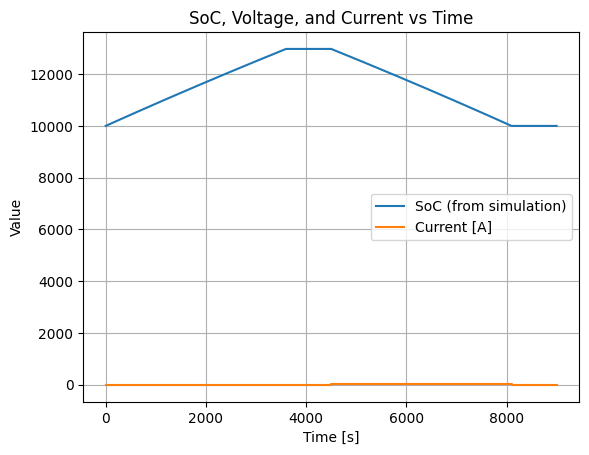

ValueError: x and y must have same first dimension, but have shapes (154,) and (100, 154)

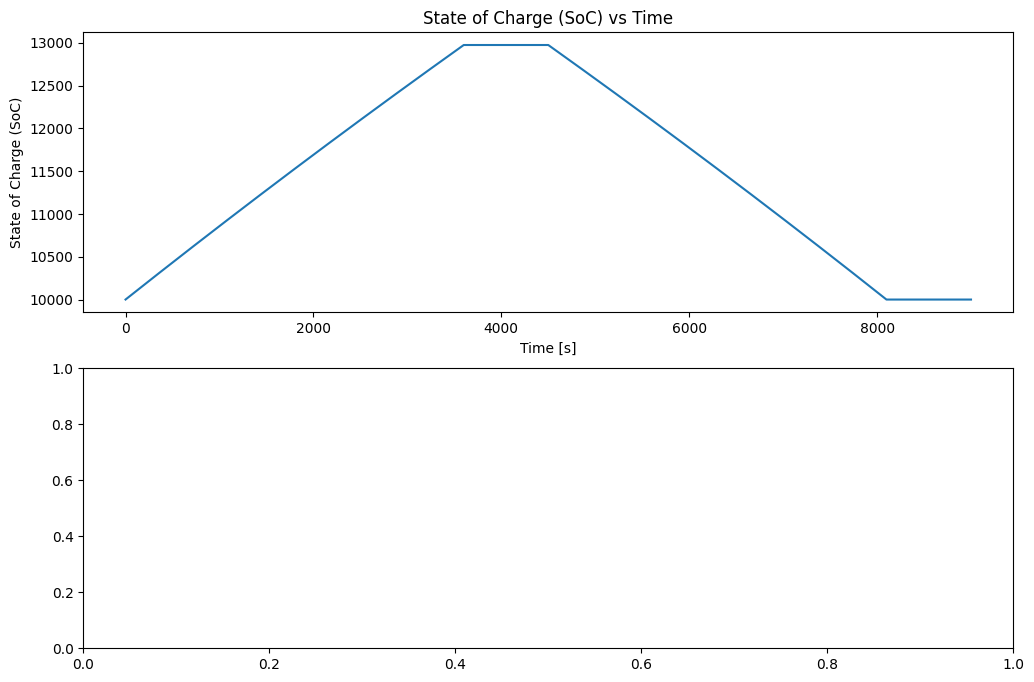

In [96]:

import pybamm
import numpy as np
import matplotlib.pyplot as plt

# Load the Thevenin equivalent circuit model
model = pybamm.pybamm.lead_acid.LOQS()
available_vars = model.variables.keys()
parameter_values = pybamm.ParameterValues("Chen2020")
parameter_values.update(get_parameter_values(), check_already_exists=False)

C_rate=0.5

capacity = parameter_values["Nominal cell capacity [A.h]"]
print(capacity)
# Define the experiment: discharge at 0.5 C-rate until a cutoff voltage
max_current=capacity*C_rate

experiment = pybamm.Experiment(
    [
        f"Charge at {max_current} A for 60 minutes",
        "Rest for 15 minutes",
        f"Discharge at {max_current} A for 60 minutes",
        "Rest for 15 minutes",
    ],
)


# min_soc = parameter_values["Minimum state of charge"]
# max_soc = parameter_values["Maximum state of charge"]
# print(f"Minimum state of charge: {min_soc}")
# print(f"Maximum state of charge: {max_soc}")


# Create and solve the simulation
try:
    simulation = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
    solution = simulation.solve()
except pybamm.SolverError as e:
    print(f"SolverError: {e}")
    print("Simulation failed. Please check the parameter values and experiment settings.")
else:
    # Extract the necessary variables for plotting
    time = solution["Time [s]"].entries
    voltage = solution["Battery voltage [V]"].entries
    soc = solution["State of Charge"].entries*100
    cell_temp = solution["Cell temperature [K]"].entries - 273.15  # Convert from K to °C
    current = solution["Current [A]"].entries
    discharge_capacity = solution["Discharge capacity [A.h]"].entries
    throughput_capacity = solution["Throughput capacity [A.h]"].entries

    current_integral = np.cumsum(np.diff(time, prepend=0) * current) / 3600  # Convert to A.h

    # Print SoC, discharge capacity, and integral of current over time
    print("Time [s]  |  SoC  |  Discharge Capacity [A.h]  |  Integral of Current [A.h]")
    for t, s, d, ci in zip(time, soc, discharge_capacity, current_integral):
        print(f"{t:.2f}  |  {s:.4f}  |  {d:.4f}  |  {ci:.4f}")


    plt.plot(time, soc, label="SoC (from simulation)")
    # plt.plot(time, voltage, label="Voltage [V]")
    plt.plot(time, current, label="Current [A]")
    plt.xlabel("Time [s]")
    plt.ylabel("Value")
    plt.title("SoC, Voltage, and Current vs Time")
    plt.legend()
    plt.grid()
    plt.show()

    
    # Plot SoC vs Time
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(time, soc)
    plt.xlabel("Time [s]")
    plt.ylabel("State of Charge (SoC)")
    plt.title("State of Charge (SoC) vs Time")

    # Plot Cell Temperature vs Voltage
    plt.subplot(2, 1, 2)
    plt.plot(time,cell_temp)
    plt.xlabel("Time")
    plt.ylabel("Cell Temperature [°C]")
    plt.title("Cell Temperature vs Time")

    plt.tight_layout()
    plt.show()

    # Plot Voltage vs Time
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(time, voltage)
    plt.xlabel("Time [s]")
    plt.ylabel("Voltage [V]")
    plt.title("Battery Voltage vs Time")

    # Plot Current vs Time
    plt.subplot(3, 1, 2)
    plt.plot(time, current)
    plt.xlabel("Time [s]")
    plt.ylabel("Current [A]")
    plt.title("Current vs Time")

    # Plot Discharge Capacity vs Time
    plt.subplot(3, 1, 3)
    plt.plot(time, discharge_capacity, label="Discharge Capacity [A.h]")
    plt.plot(time, throughput_capacity, label="Throughput Capacity [A.h]")
    plt.xlabel("Time [s]")
    plt.ylabel("Capacity [A.h]")
    plt.legend()
    plt.title("Capacity vs Time")

    plt.tight_layout()
    plt.show()
    

capacity = parameter_values["Nominal cell capacity [A.h]"]

# Define the experiment: discharge at 0.5 C-rate until a cutoff voltage
max_current=capacity*C_rate

experiment = pybamm.Experiment(
    [
        "Charge at 5 A for 30 minutes",
        "Rest for 15 minutes",
        "Discharge at 5 A for 30 minutes",
        "Rest for 15 minutes",
    ],
)

# Create and solve the simulation
try:
    simulation = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
    solution = simulation.solve()
except pybamm.SolverError as e:
    print(f"SolverError: {e}")
    print("Simulation failed. Please check the parameter values and experiment settings.")
else:
    # Extract the necessary variables for plotting
    time = solution["Time [s]"].entries
    voltage = solution["Battery voltage [V]"].entries
    soc = solution["State "].entries
    # cell_temp = solution["Cell temperature [K]"].entries - 273.15  # Convert from K to °C
    current = solution["Current [A]"].entries
    discharge_capacity = solution["Discharge capacity [A.h]"].entries
    throughput_capacity = solution["Throughput capacity [A.h]"].entries

    # Plot SoC vs Time
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(time, soc)
    plt.xlabel("Time [s]")
    plt.ylabel("State of Charge (SoC)")
    plt.title("State of Charge (SoC) vs Time")

   

    plt.tight_layout()
    plt.show()

    # Plot Voltage vs Time
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(time, voltage)
    plt.xlabel("Time [s]")
    plt.ylabel("Voltage [V]")
    plt.title("Battery Voltage vs Time")

    # Plot Current vs Time
    plt.subplot(3, 1, 2)
    plt.plot(time, current)
    plt.xlabel("Time [s]")
    plt.ylabel("Current [A]")
    plt.title("Current vs Time")

    # Plot Discharge Capacity vs Time
    plt.subplot(3, 1, 3)
    plt.plot(time, discharge_capacity, label="Discharge Capacity [A.h]")
    plt.plot(time, throughput_capacity, label="Throughput Capacity [A.h]")
    plt.xlabel("Time [s]")
    plt.ylabel("Capacity [A.h]")
    plt.legend()
    plt.title("Capacity vs Time")

    plt.tight_layout()
    plt.show()

100


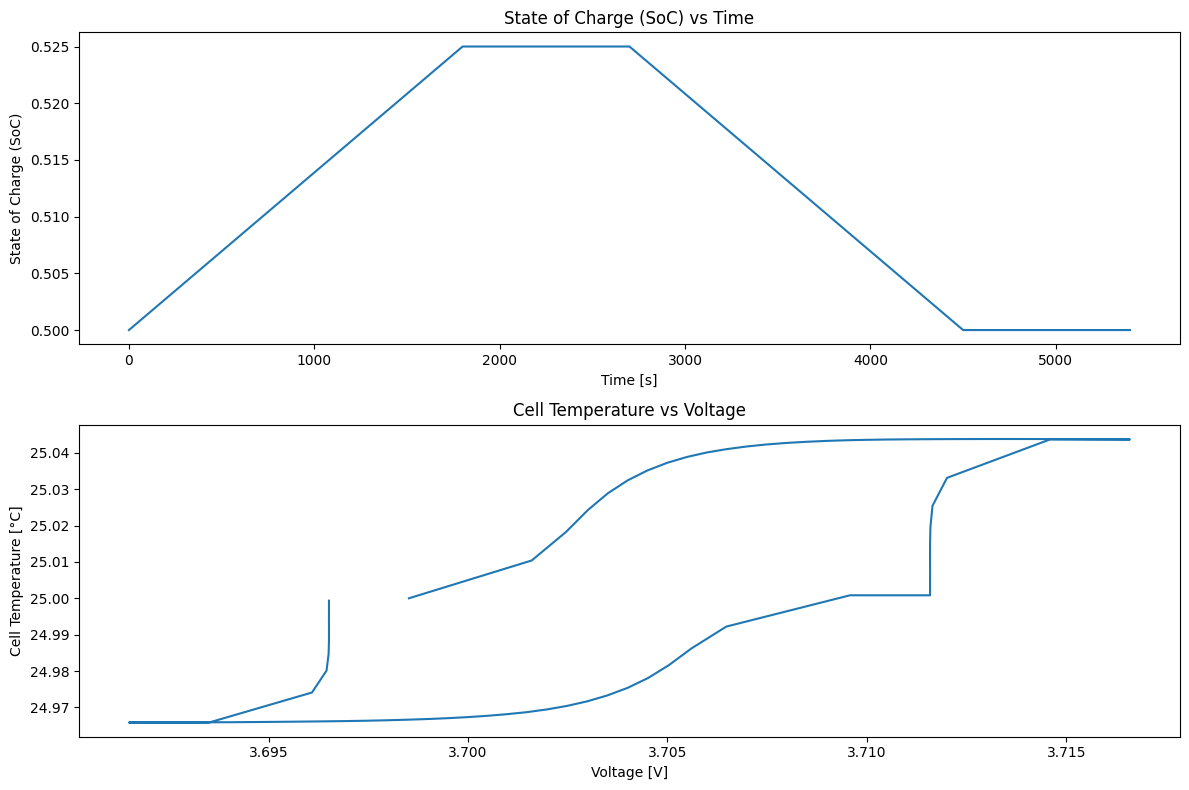

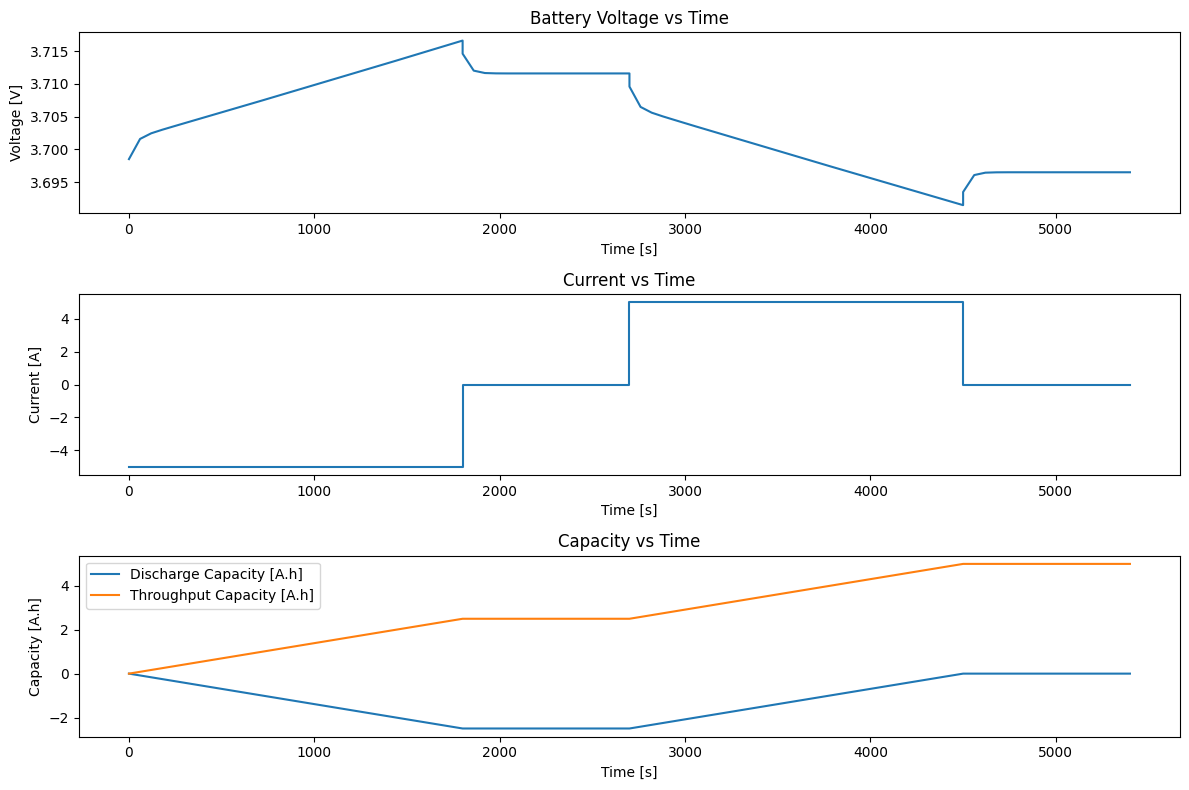

In [30]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

# Load the Thevenin equivalent circuit model
model = pybamm.equivalent_circuit.Thevenin()

# Update parameter values with the desired parameter set
parameter_values = pybamm.ParameterValues("Chen2020")
parameter_values.update(get_parameter_values(), check_already_exists=False)

C_rate = 0.05
capacity = parameter_values["Cell capacity [A.h]"]
initial_soc=parameter_values["Initial SoC"]
max_current = capacity * C_rate
print(capacity)

# Define the experiment: charge, rest, discharge, rest
experiment = pybamm.Experiment(
    [
        "Charge at 5 A for 30 minutes",
        "Rest for 15 minutes",
        "Discharge at 5 A for 30 minutes",
        "Rest for 15 minutes",
    ]
)

# Create and solve the simulation
try:
    simulation = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
    solution = simulation.solve()
except pybamm.SolverError as e:
    print(f"SolverError: {e}")
    print("Simulation failed. Please check the parameter values and experiment settings.")
else:
    # Extract the necessary variables for plotting
    time = solution["Time [s]"].entries
    voltage = solution["Battery voltage [V]"].entries
    discharge_capacity = solution["Discharge capacity [A.h]"].entries
    throughput_capacity = solution["Throughput capacity [A.h]"].entries
    cell_temp = solution["Cell temperature [K]"].entries - 273.15  # Convert from K to °C
    current = solution["Current [A]"].entries

    # Calculate SoC from discharge capacity
    soc = initial_soc-(discharge_capacity)/100
    
    # Plot SoC vs Time
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(time, soc)
    plt.xlabel("Time [s]")
    plt.ylabel("State of Charge (SoC)")
    plt.title("State of Charge (SoC) vs Time")

    # Plot Cell Temperature vs Voltage
    plt.subplot(2, 1, 2)
    plt.plot(voltage, cell_temp)
    plt.xlabel("Voltage [V]")
    plt.ylabel("Cell Temperature [°C]")
    plt.title("Cell Temperature vs Voltage")

    plt.tight_layout()
    plt.show()

    # Plot Voltage vs Time
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(time, voltage)
    plt.xlabel("Time [s]")
    plt.ylabel("Voltage [V]")
    plt.title("Battery Voltage vs Time")

    # Plot Current vs Time
    plt.subplot(3, 1, 2)
    plt.plot(time, current)
    plt.xlabel("Time [s]")
    plt.ylabel("Current [A]")
    plt.title("Current vs Time")

    # Plot Discharge Capacity and Throughput Capacity vs Time
    plt.subplot(3, 1, 3)
    plt.plot(time, discharge_capacity, label="Discharge Capacity [A.h]")
    plt.plot(time, throughput_capacity, label="Throughput Capacity [A.h]")
    plt.xlabel("Time [s]")
    plt.ylabel("Capacity [A.h]")
    plt.legend()
    plt.title("Capacity vs Time")

    plt.tight_layout()
    plt.show()


100


2024-07-05 17:54:00.997 - [WARNING] callbacks.on_experiment_infeasible(231): 

	Experiment is infeasible: 'event: Minimum SoC' was triggered during 'Discharge at 5.0 A for 30 minutes'. The returned solution only contains up to step 1 of cycle 3. 


Time (s): 4499.280000001001
SoC (simulation): 0.0000
SoC (integrated): -0.0000
Discharge Capacity [A.h]: -0.0010


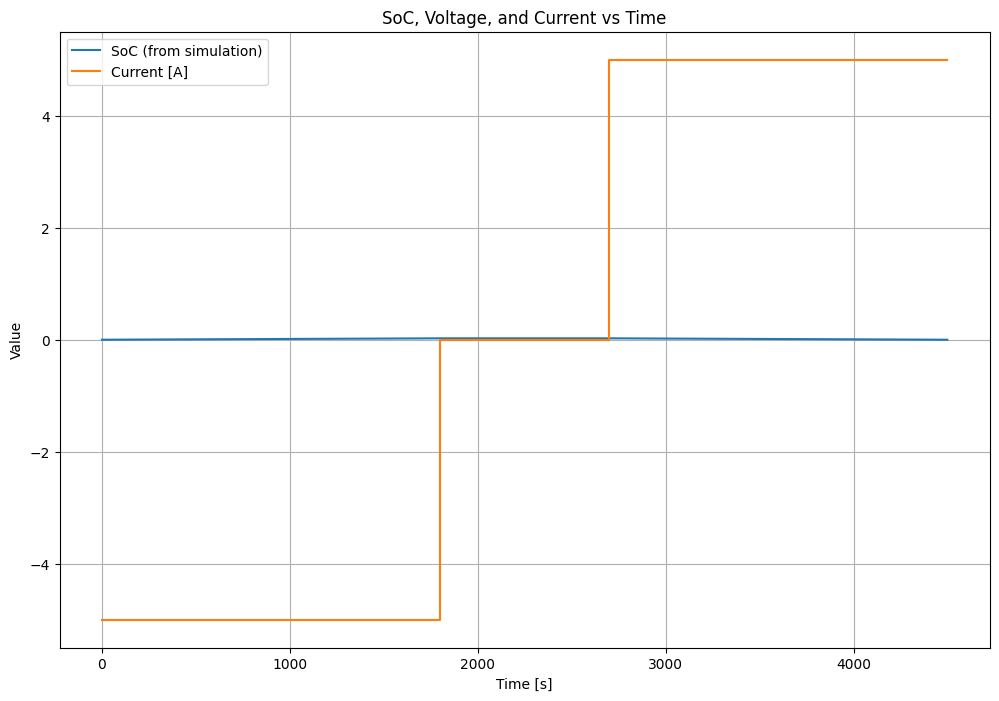

    Time (s)     SoC (simulation)     SoC (integrated)  Discharge Capacity [A.h]
           0               0.0000               0.0008                    0.0000
         420               0.0058               0.0067                   -0.5833
         840               0.0117               0.0125                   -1.1667
        1260               0.0175               0.0183                   -1.7500
        1680               0.0233               0.0242                   -2.3333
        2040               0.0250               0.0258                   -2.5000
        2460               0.0250               0.0258                   -2.5000
        2820               0.0233               0.0233                   -2.3333
        3240               0.0175               0.0175                   -1.7500
        3660               0.0117               0.0117                   -1.1667
        4080               0.0058               0.0058                   -0.5833
        4499               0

In [53]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

# Load the Thevenin equivalent circuit model
model = pybamm.equivalent_circuit.Thevenin()
available_vars = model.variables.keys()
parameter_values = pybamm.ParameterValues("Chen2020")
parameter_values.update(get_parameter_values(), check_already_exists=False)

C_rate = 0.05

capacity = parameter_values["Nominal cell capacity [A.h]"]
print(capacity)
# Define the experiment: discharge at 0.5 C-rate until a cutoff voltage
max_current = capacity * C_rate

experiment = pybamm.Experiment(
    [
        f"Charge at {max_current} A for 30 minutes",
        "Rest for 15 minutes",
        f"Discharge at {max_current} A for 30 minutes",
        "Rest for 15 minutes",
    ],
)

# Create and solve the simulation
try:
    simulation = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
    solution = simulation.solve()
except pybamm.SolverError as e:
    print(f"SolverError: {e}")
    print("Simulation failed. Please check the parameter values and experiment settings.")
else:
    # Extract the necessary variables for plotting
    time = solution["Time [s]"].entries
    voltage = solution["Battery voltage [V]"].entries
    soc = solution["SoC"].entries
    cell_temp = solution["Cell temperature [K]"].entries - 273.15  # Convert from K to °C
    current = solution["Current [A]"].entries
    discharge_capacity = solution["Discharge capacity [A.h]"].entries
    throughput_capacity = solution["Throughput capacity [A.h]"].entries

    # Calculate the integral of the current to get SoC
    integrated_current = np.cumsum(current) * (time[0] - time[1]) / 3600  # Convert to A.h
    integrated_soc = (integrated_current / capacity)
    particular_time = 5000  # for example, 5000 seconds

    # Find the index of the closest time value
    closest_index = np.abs(time - particular_time).argmin()
    

    # Print the values at the particular time
    print(f"Time (s): {time[closest_index]}")
    print(f"SoC (simulation): {soc[closest_index]:.4f}")
    print(f"SoC (integrated): {integrated_soc[closest_index]:.4f}")
    print(f"Discharge Capacity [A.h]: {discharge_capacity[closest_index]:.4f}")
    # Plot SoC, Voltage, and Current vs Time on the same graph
    plt.figure(figsize=(12, 8))
    
    plt.plot(time, soc, label="SoC (from simulation)")
    # plt.plot(time, voltage, label="Voltage [V]")
    plt.plot(time, current, label="Current [A]")
    plt.xlabel("Time [s]")
    plt.ylabel("Value")
    plt.title("SoC, Voltage, and Current vs Time")
    plt.legend()
    plt.grid()
    plt.show()



2024-07-08 16:49:30.451 - [WARNING] callbacks.on_experiment_infeasible(231): 

	Experiment is infeasible: 'event: Minimum voltage [V]' was triggered during 'Discharge at 2.5 A for 240 minutes'. The returned solution only contains up to step 1 of cycle 1. 


0.00 | -0.00 | -0.0000  |  -0.0000
10.00 | -0.00 | -0.0069  |  -0.0069
20.00 | -0.00 | -0.0139  |  -0.0139
30.00 | -0.00 | -0.0208  |  -0.0208
40.00 | -0.01 | -0.0278  |  -0.0278
50.00 | -0.01 | -0.0347  |  -0.0347
60.00 | -0.01 | -0.0417  |  -0.0417
70.00 | -0.01 | -0.0486  |  -0.0486
80.00 | -0.01 | -0.0556  |  -0.0556
90.00 | -0.01 | -0.0625  |  -0.0625
100.00 | -0.01 | -0.0694  |  -0.0694
110.00 | -0.02 | -0.0764  |  -0.0764
120.00 | -0.02 | -0.0833  |  -0.0833
130.00 | -0.02 | -0.0903  |  -0.0903
140.00 | -0.02 | -0.0972  |  -0.0972
150.00 | -0.02 | -0.1042  |  -0.1042
160.00 | -0.02 | -0.1111  |  -0.1111
170.00 | -0.02 | -0.1181  |  -0.1181
180.00 | -0.03 | -0.1250  |  -0.1250
190.00 | -0.03 | -0.1319  |  -0.1319
200.00 | -0.03 | -0.1389  |  -0.1389
210.00 | -0.03 | -0.1458  |  -0.1458
220.00 | -0.03 | -0.1528  |  -0.1528
230.00 | -0.03 | -0.1597  |  -0.1597
240.00 | -0.03 | -0.1667  |  -0.1667
250.00 | -0.03 | -0.1736  |  -0.1736
260.00 | -0.04 | -0.1806  |  -0.1806
270.00 | -0.

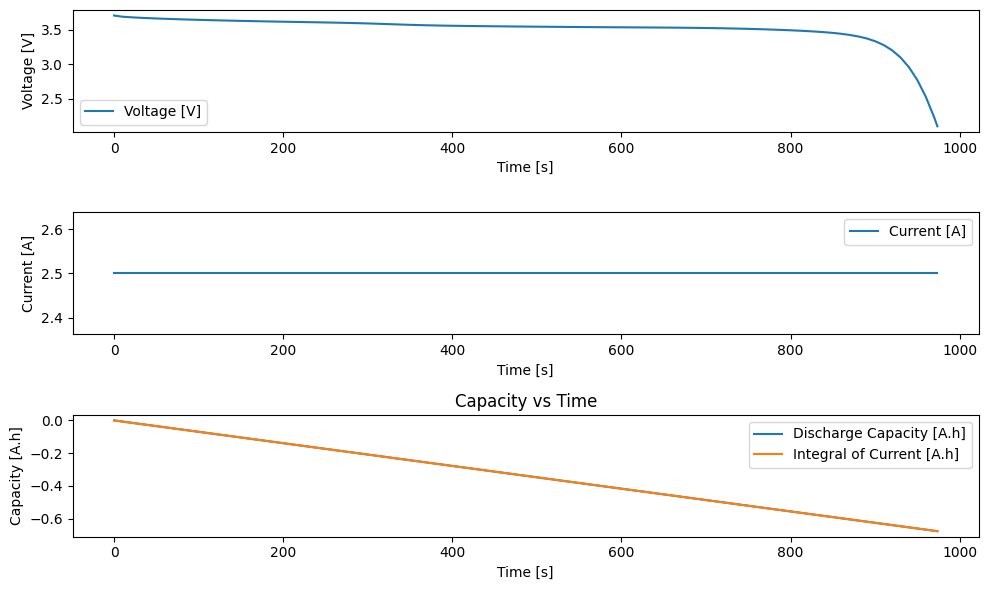

In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

# Load a lithium-ion battery model
model = pybamm.lithium_ion.SPM()
capacity=5

# Define the experiment parameters
experiment = pybamm.Experiment(
    [
     f"Discharge at  A until 2.5 V",
    ],
    period="10 seconds",
)

# Create a simulation object
sim = pybamm.Simulation(model, experiment=experiment)

# Run the simulation
sim.solve()

# Plot the results
solution = sim.solution
t = solution["Time [s]"].entries
voltage = solution["Terminal voltage [V]"].entries
current = solution["Current [A]"].entries
discharge_capacity = -1*solution["Discharge capacity [A.h]"].entries
current_integral = -1*np.cumsum(np.diff(t, prepend=0) * current) / 3600  # Convert to A.h
soc= discharge_capacity/capacity
    # Print SoC, discharge capacity, and integral of current over time
    # print("Time [s]  |  Discharge Capacity [A.h]  |  Integral of Current [A.h]")
for ti,s, d, ci in zip(t, soc, discharge_capacity, current_integral):
   print(f"{ti:.2f} | {s:.2f} | {d:.4f}  |  {ci:.4f}")

plt.figure(figsize=(10, 6))

# Plot voltage vs. time
plt.subplot(3, 1, 1)
plt.plot(t, voltage, label="Voltage [V]")
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.legend()

# Plot current vs. time
plt.subplot(3, 1, 2)
plt.plot(t, current, label="Current [A]")
plt.xlabel("Time [s]")
plt.ylabel("Current [A]")
plt.legend()

# Plot discharge capacity vs. time
plt.subplot(3, 1, 3)
plt.plot(t, discharge_capacity, label="Discharge Capacity [A.h]")
# plt.plot(time, throughput_capacity, label="Throughput Capacity [A.h]")
plt.plot(t, current_integral, label="Integral of Current [A.h]")
plt.xlabel("Time [s]")
plt.ylabel("Capacity [A.h]")
plt.legend()
plt.title("Capacity vs Time")

plt.tight_layout()
plt.show()